In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')




In [42]:
df2=pd.read_csv('./datasets/new_data.csv',encoding='euc-kr',index_col=0)
df2

,달러원종가,달러원시가,CD91,WTI가,달러위안화,달러엔,달러인덱스,유로달러,유로인덱스,콜금리,코스피종가,BIR,target
0,1150.00,1164.07,2.88,81.64,6.8285,92.47,92.3566,1.4413,106.23,1.980,1696.140015,2.38,0
1,1140.20,1151.00,2.88,81.47,6.8268,91.58,92.2236,1.4369,105.82,1.980,1690.619995,2.34,0
2,1129.20,1140.20,2.88,83.25,6.8278,92.38,92.0941,1.4413,106.11,1.960,1705.319946,2.37,0
3,1138.20,1129.20,2.88,82.69,6.8281,93.45,92.3684,1.4318,105.84,1.990,1683.449951,2.41,1
4,1128.25,1135.50,2.88,82.91,6.8276,92.68,92.1485,1.4413,106.18,2.000,1695.260010,2.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,1325.49,1336.34,3.72,87.42,7.2882,146.58,121.8185,1.0748,124.19,3.602,2556.879883,2.35,0
3314,1326.15,1326.05,3.73,88.94,7.2910,147.08,121.7721,1.0752,124.21,3.597,2536.580078,2.34,1
3315,1326.59,1326.72,3.75,88.80,7.2700,147.45,121.5454,1.0728,124.25,3.592,2534.699951,2.35,0
3316,1329.52,1328.20,3.76,90.67,7.2770,147.47,121.7192,1.0641,124.19,3.587,2572.889893,2.34,1


<Axes: >

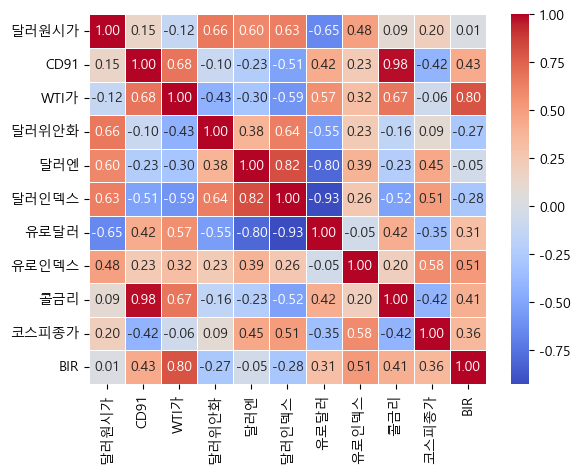

In [49]:
corr_data = df2[[ '달러원시가','CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']].corr()

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

In [50]:
corr_data = df2[[ '달러원종가','CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']]

np.abs(corr_data.corr()['달러원종가']).sort_values(ascending=False)

달러원종가    1.000000
달러위안화    0.660879
유로달러     0.651892
달러인덱스    0.633140
달러엔      0.595101
유로인덱스    0.481935
코스피종가    0.196201
CD91     0.146141
WTI가     0.120356
콜금리      0.093491
BIR      0.014383
Name: 달러원종가, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
corr_data=corr_data.fillna(0)
y=corr_data['달러원종가']
X=corr_data.drop( ['달러원종가'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)

weight: [ 8.24288314e+01  3.92542378e-01  3.27645115e+01 -1.20248228e+00
 -2.03410803e+00 -8.00164430e+02  5.44614081e+00 -7.41955374e+01
 -4.89635150e-02 -2.35229611e+01]
bias: 1793.062439905024


In [53]:
coef=pd.Series(data=np.round(lr_model.coef_,1), index=X.columns)
coef

CD91      82.4
WTI가       0.4
달러위안화     32.8
달러엔       -1.2
달러인덱스     -2.0
유로달러    -800.2
유로인덱스      5.4
콜금리      -74.2
코스피종가     -0.0
BIR      -23.5
dtype: float64

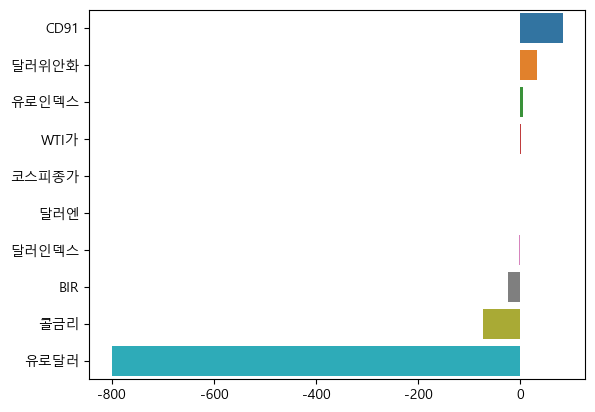

In [54]:
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_model.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:787.655173, RMSE:28.065, r2:0.857


In [56]:
result=pd.DataFrame({'y':y_test.values,'y_pred':y_pred, 'diff':np.abs(y_test.values-y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
744,1239.28,1344.719608,105.439608
404,1253.50,1354.384909,100.884909
603,1439.96,1341.205344,98.754656
549,1237.26,1324.279041,87.019041
984,1394.68,1309.539153,85.140847
...,...,...,...
347,1117.50,1117.341554,0.158446
809,1167.72,1167.843741,0.123741
869,1116.50,1116.615808,0.115808
111,1073.89,1073.777214,0.112786


In [68]:
from sklearn.feature_selection import SelectKBest, f_regression

X_selected=SelectKBest(score_func= f_regression, k=3)
X_selected.fit_transform(X,y)
features = X.columns[X_selected.get_support()]
print('features={}'.format(features))
# 3개 features 에 'CD91','콜금리' 추가함 
corr_features = corr_data[['달러위안화', '달러엔', '유로달러','콜금리']]

features=Index(['달러위안화', '달러인덱스', '유로달러'], dtype='object')


In [69]:
X_selected=corr_features
X_train, X_test, y_train, y_test= train_test_split(X_selected,y,test_size=0.3, random_state=42)
lr_model2=LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:1645.965181, RMSE:40.570, r2:0.701


In [70]:
# polynomialFeatures() 사용하여 2차원 다항회귀모델

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test=train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model=LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)

MSE:974.563493, RMSE:31.218, r2:0.823


In [71]:
# 데이터 전처리 

from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3=LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:1645.965181, RMSE:40.570, r2:0.701


달러위안화    0.235589
달러엔      0.093620
유로달러     0.423204
콜금리      0.177056
dtype: float64

달러원종가:1.15


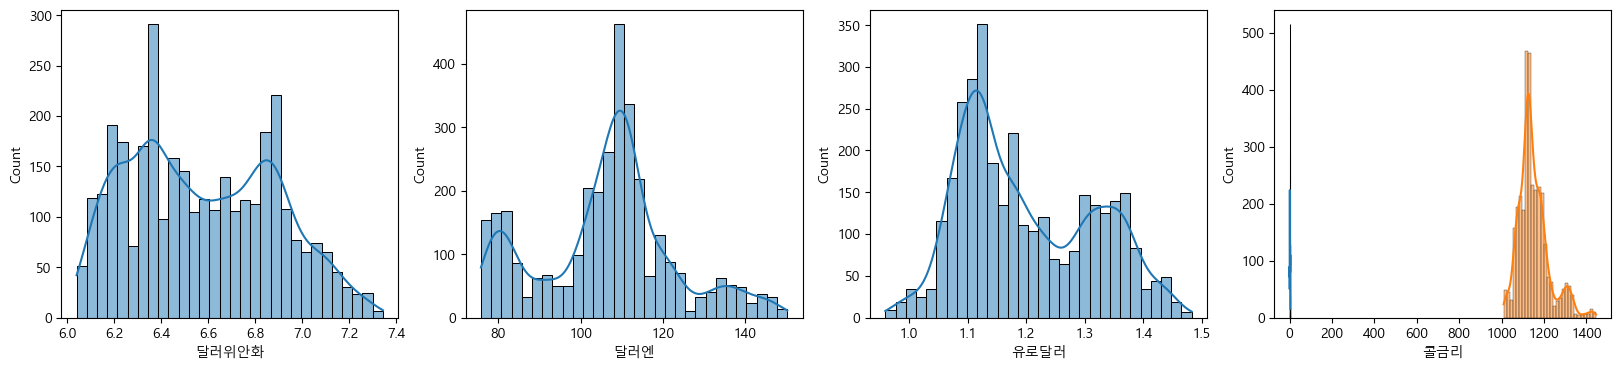

In [72]:
# 데이터 분포 확인- 히스토그램 
nrows=1
ncols=4

fig,axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=X_selected.columns[3], data=X_selected, kde=True, bins=30, ax=axs[3])


sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0:.2f}'.format(y.skew()))

달러위안화    0.235589
달러엔      0.093620
유로달러     0.353777
콜금리      0.177056
dtype: float64

달러원종가:0.93


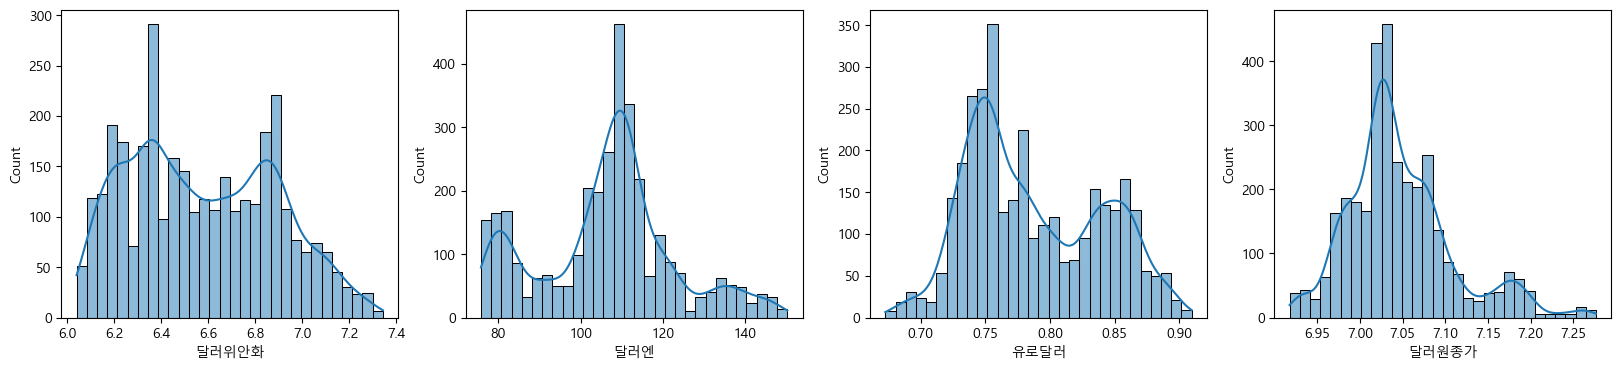

In [74]:
# 로그연산 유로달러 해보기 
X_selected['유로달러']=np.log1p(X_selected['유로달러'])
y=np.log1p(y)

# 데이터분포확인 - 히스토그램 
nrows=1
ncols=4

fig, axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0:.2f}'.format(y.skew()))

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.3, random_state=42)

lr_model4= LinearRegression()
lr_model4.fit(X_train, y_train)

y_pred= lr_model4.predict(X_test)
np.exp(y_pred)
mse=mean_squared_error(np.exp(y_test), np.exp(y_pred))
rmse=np.sqrt(mse)
r2=r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f}, RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse, rmse, r2))

MSE : 1613.874, RMSE : 40.173, r2 : 0.707


In [77]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_model, X, y, scoring='neg_mean_squared_error', cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse=(-1*scores['train_score'])
print('MSE:', mse)

rmse=np.sqrt(-1*scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균:{0:.3f}'.format(np.mean(rmse)))

Scores {'fit_time': array([0.00485897, 0.0049994 , 0.00307798]), 'score_time': array([0.00232697, 0.00303078, 0.00192928]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.02374925, -0.00086506, -0.00867172]), 'train_score': array([-0.00032526, -0.0004185 , -0.00048444])}
MSE: [0.00032526 0.0004185  0.00048444]
RMSE: [0.0180349  0.02045722 0.02200999]
RMSE 평균:0.020


In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# !pip install lightgbm

In [80]:
from lightgbm import LGBMRegressor

lgb_model=LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [81]:
model_list=[lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    y_preds=model.predict(X_test)
    mse=mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test, y_preds)
    model_name=model.__class__.__name__
    print('{0} MSE:{1:.3f}, RMSE:{2:.3f}, r2:{3:.3f}'.format(model_name, mse, rmse,r2))

LinearRegression MSE:0.001, RMSE:0.035, r2:0.695
RandomForestRegressor MSE:0.000, RMSE:0.010, r2:0.975
LGBMRegressor MSE:0.000, RMSE:0.011, r2:0.972
